In [1]:
import pandas as pd
import numpy as np
import xlsxwriter
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [2]:
#read in transaction dataset
df3 = pd.read_csv('/Users/maxnoordhoekhegt/Documents/QTEM/QDC/GBACDutchieVita/Rifornimenti_Carburante_ClubQ8.csv', sep = ';', decimal=",")


df3[['REQUEST_YEAR','REQUEST_TIME']] = df3.DATA_OPERAZIONE.str.split(" ",expand=True,)


df3 = df3.drop(columns="DATA_OPERAZIONE")

df3.columns = ['CUSTOMER_CODE', 'STATION_CODE', 'PRODUCT', 'SALES_MODALITY', 'LITRES', 'LOYALTY_POINTS_AWARDED','REQUEST_YEAR','REQUEST_TIME']

df3

,CUSTOMER_CODE,STATION_CODE,PRODUCT,SALES_MODALITY,LITRES,LOYALTY_POINTS_AWARDED,REQUEST_YEAR,REQUEST_TIME
0,7071161603600606750,584,CARICO GASOLIO,EASY,7,3,2021-03-01,00:00:57
1,7071161603000039982,155,CARICO GASOLIO,SELF,17,17,2021-03-01,00:02:53
2,7071161603000720656,4803,CARICO GASOLIO,OPT,39,19,2021-03-01,00:03:10
3,7071161603014646483,2491,CARICO HIPERFORM DIESEL,SERVITO,54,54,2021-03-01,00:05:45
4,7071161603011692357,8265,CARICO GPL,SERVITO,31,31,2021-03-01,00:07:29
...,...,...,...,...,...,...,...,...
11787857,7071161603670650324,1114,CARICO GASOLIO,SELF,50,50,2021-08-31,23:58:22
11787858,7071161603020697769,7064,CARICO BENZINA,EASY,12,6,2021-08-31,23:58:26
11787859,7071161603010864247,7933,CARICO BENZINA,OPT,9,4,2021-08-31,23:58:56
11787860,7071161603601882848,5693,CARICO GASOLIO,SERVITO,50,50,2021-08-31,23:59:03


In [3]:
#define function to count number and percentage of Na values
def summarize_na(df: pd.DataFrame) -> pd.DataFrame:
    nan_count = df.isna().sum()
    return pd.DataFrame({'nan_count': nan_count, 
                         'nan_pct': nan_count / len(df) * 100
                         }
                        )[nan_count > 0]

In [4]:
df3_nan_sum = summarize_na(df3)
df3_nan_sum

,nan_count,nan_pct


In [5]:
def get_frequencies(series: pd.Series, n_categories: int = None, 
                    bins: int = None, dropna: bool = True
                    ) -> pd.DataFrame:
    """Return a DataFrame displaying the series frequencies.
    
    Parameters
    ----------
    series: pd.Series
        The series for which frequencies are to be computed.
    n_categories: int, optional
        Maximum number of categories to return in output.
        Low-frequency categories will be grouped together to
        reach this threshold.
        
    """
    vc = series.value_counts(ascending=False, 
                             bins=bins, 
                             dropna=dropna
                             )
    if n_categories is not None:
        if not isinstance(n_categories, int) or n_categories <= 0:
            raise TypeError('n_categories should be a strictly positive integer')
        if n_categories < len(vc):
            freq_others = vc.iloc[n_categories - 1:].sum()
            vc = vc.iloc[:n_categories - 1]\
                   .append(pd.Series({'others': freq_others}))
    return pd.DataFrame({'absolute': vc, 
                         'relative': vc / len(series),
                         },
                        index=vc.index
                        )

In [6]:
#proportion for each station code
get_frequencies(df3['STATION_CODE'], n_categories=5)

,absolute,relative
7132,76192,0.006464
4522,61540,0.005221
68,58743,0.004983
138,51564,0.004374
others,11539823,0.978958


In [7]:
#proportion for each product 
get_frequencies(df3['PRODUCT'], n_categories=5)

,absolute,relative
CARICO GASOLIO,5835363,0.495031
CARICO BENZINA,4403314,0.373546
CARICO GPL,641881,0.054453
CARICO HIPERFORM DIESEL,551675,0.046800
others,355629,0.030169


In [8]:
#proportion for mode of sales
get_frequencies(df3['SALES_MODALITY'], n_categories=5)

,absolute,relative
SELF,6167973,0.523248
SERVITO,4706534,0.399270
EASY,546173,0.046334
OPT,348523,0.029566
OPT POS,18659,0.001583


In [9]:
#descriptive statistics for the number of litres being bought
df3['LITRES'].describe().apply("{0:.5f}".format)

count    11787862.00000
mean           40.55607
std            45.62399
min             1.00000
25%            20.00000
50%            33.00000
75%            50.00000
max          1200.00000
Name: LITRES, dtype: object

In [10]:
#descriptive statistics of the variable loyalty points
df3['LOYALTY_POINTS_AWARDED'].describe().apply("{0:.5f}".format)

count    11787862.00000
mean           37.23561
std            25.89148
min          -180.00000
25%            18.00000
50%            31.00000
75%            50.00000
max           240.00000
Name: LOYALTY_POINTS_AWARDED, dtype: object

In [11]:
#read in customer database
df2 = pd.read_csv('/Users/maxnoordhoekhegt/Documents/QTEM/QDC/GBACDutchieVita/Anagrafica_ClubQ8.csv', sep = ';', decimal=",")

df2['DATE_JOINED'] = df2['DATA_BATTESIMO']

df2 = df2.drop(columns="DATA_BATTESIMO")

df2.columns = ['CUSTOMER_CODE', 'SEX', 'DOB', 'REGION', 'PROVINCE', 'CITY', 'TYPE_OF_CARD' ,'TOTAL_POINTS', 'DATE_JOINED']

df2

,CUSTOMER_CODE,SEX,DOB,REGION,PROVINCE,CITY,TYPE_OF_CARD,TOTAL_POINTS,DATE_JOINED
0,7071161603018922195,M,1951-09-14 00:00:00,LAZIO,VITERBO,SUTRI,STARQ8_FISICA,511.0,2015-01-08 12:32:58
1,7071161603005992565,F,1988-09-15 00:00:00,NaN,NaN,NaN,STARQ8_FISICA,379.0,2020-07-10 12:22:35
2,7071161603025867243,F,1943-09-09 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,108.0,2020-07-10 18:07:14
3,7071161603021997861,M,1974-03-01 00:00:00,SICILIA,MESSINA,MESSINA,STARQ8_FISICA,100.0,2020-07-10 18:08:21
4,7071161603025554049,M,1963-11-22 00:00:00,CAMPANIA,SALERNO,EBOLI,STARQ8_FISICA,284.0,2020-07-10 18:09:27
...,...,...,...,...,...,...,...,...,...
1656132,7071161603672630225,F,1962-06-22 00:00:00,EMILIA ROMAGNA,RIMINI,SAN GIOVANNI IN MARIGNANO,STARQ8_FISICA,2741.0,2019-11-27 18:06:31
1656133,7071161603673015798,M,1967-03-19 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,8996.0,2019-03-21 08:34:30
1656134,7071161603024035909,M,1987-03-18 00:00:00,SICILIA,PALERMO,PALERMO,STARQ8_FISICA,424.0,2021-01-19 09:07:37
1656135,7071161603601002132,F,1984-09-20 00:00:00,LOMBARDIA,BRESCIA,ISEO,STARQ8_VIRTUALE,740.0,2020-12-15 22:57:21


In [12]:
#merge transaction and customer database
df = pd.merge(df3, df2, how = 'left')

In [13]:
df

,CUSTOMER_CODE,STATION_CODE,PRODUCT,SALES_MODALITY,LITRES,LOYALTY_POINTS_AWARDED,REQUEST_YEAR,REQUEST_TIME,SEX,DOB,REGION,PROVINCE,CITY,TYPE_OF_CARD,TOTAL_POINTS,DATE_JOINED
0,7071161603600606750,584,CARICO GASOLIO,EASY,7,3,2021-03-01,00:00:57,M,1957-05-13 00:00:00,PIEMONTE,TORINO,TORINO,STARQ8_VIRTUALE,457.0,2020-06-01 15:12:55
1,7071161603000039982,155,CARICO GASOLIO,SELF,17,17,2021-03-01,00:02:53,M,1961-02-20 00:00:00,PIEMONTE,TORINO,CIRIE',STARQ8_FISICA,1198.0,2021-02-01 10:50:35
2,7071161603000720656,4803,CARICO GASOLIO,OPT,39,19,2021-03-01,00:03:10,M,1992-08-11 00:00:00,LIGURIA,LA SPEZIA,SARZANA,STARQ8_FISICA,1837.0,2020-07-09 08:18:23
3,7071161603014646483,2491,CARICO HIPERFORM DIESEL,SERVITO,54,54,2021-03-01,00:05:45,F,1979-04-25 00:00:00,VENETO,PADOVA,PADOVA,STARQ8_FISICA,1803.0,2015-03-11 22:28:35
4,7071161603011692357,8265,CARICO GPL,SERVITO,31,31,2021-03-01,00:07:29,M,1971-03-27 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,17568.0,2001-10-21 17:43:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11787857,7071161603670650324,1114,CARICO GASOLIO,SELF,50,50,2021-08-31,23:58:22,M,1965-10-15 00:00:00,SICILIA,ENNA,PIAZZA ARMERINA,STARQ8_FISICA,22415.0,2013-09-08 07:59:48
11787858,7071161603020697769,7064,CARICO BENZINA,EASY,12,6,2021-08-31,23:58:26,M,1993-09-03 00:00:00,CAMPANIA,NAPOLI,NAPOLI,STARQ8_FISICA,283.0,2021-06-22 17:35:49
11787859,7071161603010864247,7933,CARICO BENZINA,OPT,9,4,2021-08-31,23:58:56,M,1977-03-17 00:00:00,CAMPANIA,SALERNO,EBOLI,STARQ8_FISICA,328.0,2021-08-18 11:12:32
11787860,7071161603601882848,5693,CARICO GASOLIO,SERVITO,50,50,2021-08-31,23:59:03,M,1997-04-11 00:00:00,LAZIO,ROMA,ROMA,STARQ8_VIRTUALE,2430.0,2021-08-31 23:06:09


In [14]:
df['SALES_MODALITY'].unique()

array(['EASY', 'SELF', 'OPT', 'SERVITO', 'OPT POS'], dtype=object)

In [ ]:
dfeasy = df[['SALES_MODALITY'=="EASY",'REQUEST_YEAR']]

In [16]:
#look at differeces in total points across males and females
t = df.groupby('SEX')[['TOTAL_POINTS']].agg('mean')
t

,TOTAL_POINTS
SEX,
F,2382.701396
M,3337.432468


This part is for future analysis for now, we will add purchase frequencies for customers and conduct an RFM analysis

In [17]:
df['REQUEST_YEAR'] = pd.to_datetime(df['REQUEST_YEAR'])


In [18]:
df['REQUEST_TIME'] = pd.Timestamp(df['REQUEST_TIME'])

TypeError: Cannot convert input [0           00:00:57
1           00:02:53
2           00:03:10
3           00:05:45
4           00:07:29
              ...   
11787857    23:58:22
11787858    23:58:26
11787859    23:58:56
11787860    23:59:03
11787861    23:59:18
Name: REQUEST_TIME, Length: 11787862, dtype: object] of type <class 'pandas.core.series.Series'> to Timestamp

In [19]:
df['REQUEST_TIME']

0           00:00:57
1           00:02:53
2           00:03:10
3           00:05:45
4           00:07:29
              ...   
11787857    23:58:22
11787858    23:58:26
11787859    23:58:56
11787860    23:59:03
11787861    23:59:18
Name: REQUEST_TIME, Length: 11787862, dtype: object

In [20]:
df['Datetime'] = df["REQUEST_YEAR"].astype(str) + " " + df["REQUEST_TIME"].astype(str)

In [21]:
df['DATETIME']= pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S')

In [22]:
today_date = pd.to_datetime(date.today())
today_date

Timestamp('2022-01-12 00:00:00')

In [23]:
df['DATETIME']= pd.to_datetime(df['REQUEST_YEAR'] + df['REQUEST_TIME'], format='%m-%d-%Y%H:%M:%S')

/Users/maxnoordhoekhegt/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimelike.py:1187: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  warnings.warn(


TypeError: unsupported operand type(s) for +: 'Timestamp' and 'str'

In [30]:
#linear regression
import numpy as np
from sklearn.linear_model import LinearRegression
x = np.array(freq('CUSTOMER CODE')).reshape((-1, 1))
y = np.array('CUSTOMER CODE')
print(x)
print(y)
model = LinearRegression()
model.fit(x,y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print('intercept:', new_model.intercept_)
print('slope:', new_model.coef_)
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')
y_pred = model.intercept_ + model.coef_ * x
print('predicted response:', y_pred, sep='\n')
x_new = np.arange(5).reshape((-1, 1))
print(x_new)
y_new = model.predict(x_new)
print(y_new)

NameError: name 'freq' is not defined

In [ ]:
df

In [24]:
rfm = df.groupby('CUSTOMER_CODE').agg({
    'DATETIME': lambda x: (today_date - x.max()).days,
    'CUSTOMER_CODE': lambda x: len(x),
    'LITRES': lambda x: x.sum()
})
rfm.columns = ['recency', 'frequency', 'monetary']
rfm = rfm[rfm['monetary'] > 0]

In [25]:
rfm

,recency,frequency,monetary
CUSTOMER_CODE,,,
7071161603000001164,150,2,96
7071161603000001198,180,6,326
7071161603000001255,152,1,12
7071161603000001305,139,19,509
7071161603000001313,161,11,308
...,...,...,...
7071161603690008099,134,29,1290
7071161603690008115,171,4,167
7071161603690008206,134,26,1051


In [32]:
rfm_modality = pd.merge(rfm, df[['CUSTOMER_CODE','SALES_MODALITY']],on='CUSTOMER_CODE',how='left')

In [33]:
rfm_modality

,CUSTOMER_CODE,recency,frequency,monetary,SALES_MODALITY
0,7071161603000001164,150,2,96,SELF
1,7071161603000001164,150,2,96,SELF
2,7071161603000001198,180,6,326,SERVITO
3,7071161603000001198,180,6,326,SERVITO
4,7071161603000001198,180,6,326,SERVITO
...,...,...,...,...,...
11787857,7071161603690008263,152,6,234,SELF
11787858,7071161603690008263,152,6,234,SELF
11787859,7071161603690008263,152,6,234,SELF
11787860,7071161603690008263,152,6,234,SELF


In [34]:
rfm_easy = rfm_modality[rfm_modality.SALES_MODALITY == 'EASY']
rfm_easy

,CUSTOMER_CODE,recency,frequency,monetary,SALES_MODALITY
45,7071161603000001370,153,22,381,EASY
46,7071161603000001370,153,22,381,EASY
51,7071161603000001370,153,22,381,EASY
54,7071161603000001370,153,22,381,EASY
57,7071161603000001370,153,22,381,EASY
...,...,...,...,...,...
11787820,7071161603690008099,134,29,1290,EASY
11787821,7071161603690008099,134,29,1290,EASY
11787822,7071161603690008099,134,29,1290,EASY
11787823,7071161603690008099,134,29,1290,EASY


In [35]:
rfm_self = rfm_modality[rfm_modality.SALES_MODALITY == 'SELF']
rfm_self

,CUSTOMER_CODE,recency,frequency,monetary,SALES_MODALITY
0,7071161603000001164,150,2,96,SELF
1,7071161603000001164,150,2,96,SELF
9,7071161603000001305,139,19,509,SELF
10,7071161603000001305,139,19,509,SELF
11,7071161603000001305,139,19,509,SELF
...,...,...,...,...,...
11787857,7071161603690008263,152,6,234,SELF
11787858,7071161603690008263,152,6,234,SELF
11787859,7071161603690008263,152,6,234,SELF
11787860,7071161603690008263,152,6,234,SELF


In [38]:
rfm_opt = rfm_modality[rfm_modality.SALES_MODALITY == 'OPT']

In [37]:
rfm_servito = rfm_modality[rfm_modality.SALES_MODALITY == 'SERVITO']

In [39]:
rfm_opt_pos = rfm_modality[rfm_modality.SALES_MODALITY == 'OPT POS']

In [41]:
 quantiles = rfm.quantile(q=[0.25,0.50,0.75])
 quantiles = quantiles.to_dict()
 def RScore(x,p,d):
      if x <= d[p][0.25]:
       return 1
      elif x <= d[p][0.50]:
       return 2
      elif x <= d[p][0.75]:
       return 3
      else:
       return 4

 def FMScore(x,p,d):
      if x <= d[p][0.25]:
       return 4
      elif x <= d[p][0.50]:
       return 3
      elif x <= d[p][0.75]:
       return 2
      else:
       return 1

rfm_easy['R_quartile'] = rfm_easy['recency'].apply(RScore, args=('recency',quantiles))
rfm_easy['F_quartile'] = rfm_easy['frequency'].apply(FMScore, args=('frequency',quantiles))
rfm_easy['M_quartile'] = rfm_easy['monetary'].apply(FMScore, args=('monetary',quantiles))
rfm_easy.head()
                                                              
rfm_easy['RFM_Segment'] = rfm_easy.R_quartile.map(str)+rfm_easy.F_quartile.map(str)+rfm_easy.M_quartile.map(str)
rfm_easy['RFM_Score'] = rfm_easy[['R_quartile','F_quartile','M_quartile']].sum(axis=1)

print("Best Customers: ", len(rfm_easy[rfm_easy['RFM_Segment']=='111']))
print("Loyal Customers: ", len(rfm_easy[rfm_easy['F_quartile']==1]))
print("Big Spenders: ", len(rfm_easy[rfm_easy['M_quartile']==1]))
print("Almost Lost: ", len(rfm_easy[rfm_easy['RFM_Segment']=='134']))
print("Lost Customers: ", len(rfm_easy[rfm_easy['RFM_Segment']=='344']))
print("Lost Cheap Customers: ", len(rfm_easy[rfm_easy['RFM_Segment']=='444']))

/var/folders/gg/5fcrv3jj4cj3v3hdbk9d_grh0000gn/T/ipykernel_21520/4083038687.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_easy['R_quartile'] = rfm_easy['recency'].apply(RScore, args=('recency',quantiles))
/var/folders/gg/5fcrv3jj4cj3v3hdbk9d_grh0000gn/T/ipykernel_21520/4083038687.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_easy['F_quartile'] = rfm_easy['frequency'].apply(FMScore, args=('frequency',quantiles))
/var/folders/gg/5fcrv3jj4cj3v3hdbk9d_grh0000gn/T/ipykernel_21520/4083038687

Best Customers:  187653
Loyal Customers:  370942
Big Spenders:  288153
Almost Lost:  1545
Lost Customers:  2791
Lost Cheap Customers:  12793


In [44]:
 quantiles = rfm.quantile(q=[0.25,0.50,0.75])
 quantiles = quantiles.to_dict()
 def RScore(x,p,d):
      if x <= d[p][0.25]:
       return 1
      elif x <= d[p][0.50]:
       return 2
      elif x <= d[p][0.75]:
       return 3
      else:
       return 4

 def FMScore(x,p,d):
      if x <= d[p][0.25]:
       return 4
      elif x <= d[p][0.50]:
       return 3
      elif x <= d[p][0.75]:
       return 2
      else:
       return 1

rfm_self['R_quartile'] = rfm_self['recency'].apply(RScore, args=('recency',quantiles))
rfm_self['F_quartile'] = rfm_self['frequency'].apply(FMScore, args=('frequency',quantiles))
rfm_self['M_quartile'] = rfm_self['monetary'].apply(FMScore, args=('monetary',quantiles))
rfm_self.head()
                                                              
rfm_self['RFM_Segment'] = rfm_self.R_quartile.map(str)+rfm_self.F_quartile.map(str)+rfm_self.M_quartile.map(str)
rfm_self['RFM_Score'] = rfm_self[['R_quartile','F_quartile','M_quartile']].sum(axis=1)

print("Best Customers: ", len(rfm_self[rfm_self['RFM_Segment']=='111']))
print("Loyal Customers: ", len(rfm_self[rfm_self['F_quartile']==1]))
print("Big Spenders: ", len(rfm_self[rfm_self['M_quartile']==1]))
print("Almost Lost: ", len(rfm_self[rfm_self['RFM_Segment']=='134']))
print("Lost Customers: ", len(rfm_self[rfm_self['RFM_Segment']=='344']))
print("Lost Cheap Customers: ", len(rfm_self[rfm_self['RFM_Segment']=='444']))

/var/folders/gg/5fcrv3jj4cj3v3hdbk9d_grh0000gn/T/ipykernel_21520/357370563.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_self['R_quartile'] = rfm_self['recency'].apply(RScore, args=('recency',quantiles))
/var/folders/gg/5fcrv3jj4cj3v3hdbk9d_grh0000gn/T/ipykernel_21520/357370563.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_self['F_quartile'] = rfm_self['frequency'].apply(FMScore, args=('frequency',quantiles))
/var/folders/gg/5fcrv3jj4cj3v3hdbk9d_grh0000gn/T/ipykernel_21520/357370563.py

Best Customers:  1713198
Loyal Customers:  3527470
Big Spenders:  3397656
Almost Lost:  10005
Lost Customers:  49546
Lost Cheap Customers:  122397


In [45]:
 quantiles = rfm.quantile(q=[0.25,0.50,0.75])
 quantiles = quantiles.to_dict()
 def RScore(x,p,d):
      if x <= d[p][0.25]:
       return 1
      elif x <= d[p][0.50]:
       return 2
      elif x <= d[p][0.75]:
       return 3
      else:
       return 4

 def FMScore(x,p,d):
      if x <= d[p][0.25]:
       return 4
      elif x <= d[p][0.50]:
       return 3
      elif x <= d[p][0.75]:
       return 2
      else:
       return 1

rfm_servito['R_quartile'] = rfm_servito['recency'].apply(RScore, args=('recency',quantiles))
rfm_servito['F_quartile'] = rfm_servito['frequency'].apply(FMScore, args=('frequency',quantiles))
rfm_servito['M_quartile'] = rfm_servito['monetary'].apply(FMScore, args=('monetary',quantiles))
rfm_servito.head()
                                                              
rfm_servito['RFM_Segment'] = rfm_servito.R_quartile.map(str)+rfm_servito.F_quartile.map(str)+rfm_servito.M_quartile.map(str)
rfm_servito['RFM_Score'] = rfm_servito[['R_quartile','F_quartile','M_quartile']].sum(axis=1)

print("Best Customers: ", len(rfm_servito[rfm_servito['RFM_Segment']=='111']))
print("Loyal Customers: ", len(rfm_servito[rfm_servito['F_quartile']==1]))
print("Big Spenders: ", len(rfm_servito[rfm_servito['M_quartile']==1]))
print("Almost Lost: ", len(rfm_servito[rfm_servito['RFM_Segment']=='134']))
print("Lost Customers: ", len(rfm_servito[rfm_servito['RFM_Segment']=='344']))
print("Lost Cheap Customers: ", len(rfm_servito[rfm_servito['RFM_Segment']=='444']))

/var/folders/gg/5fcrv3jj4cj3v3hdbk9d_grh0000gn/T/ipykernel_21520/1108669561.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_servito['R_quartile'] = rfm_servito['recency'].apply(RScore, args=('recency',quantiles))
/var/folders/gg/5fcrv3jj4cj3v3hdbk9d_grh0000gn/T/ipykernel_21520/1108669561.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_servito['F_quartile'] = rfm_servito['frequency'].apply(FMScore, args=('frequency',quantiles))
/var/folders/gg/5fcrv3jj4cj3v3hdbk9d_grh0000gn/T/ipykernel_2152

Best Customers:  1299574
Loyal Customers:  2692979
Big Spenders:  2483872
Almost Lost:  9300
Lost Customers:  39452
Lost Cheap Customers:  90651


In [46]:
 quantiles = rfm.quantile(q=[0.25,0.50,0.75])
 quantiles = quantiles.to_dict()
 def RScore(x,p,d):
      if x <= d[p][0.25]:
       return 1
      elif x <= d[p][0.50]:
       return 2
      elif x <= d[p][0.75]:
       return 3
      else:
       return 4

 def FMScore(x,p,d):
      if x <= d[p][0.25]:
       return 4
      elif x <= d[p][0.50]:
       return 3
      elif x <= d[p][0.75]:
       return 2
      else:
       return 1

rfm_opt['R_quartile'] = rfm_opt['recency'].apply(RScore, args=('recency',quantiles))
rfm_opt['F_quartile'] = rfm_opt['frequency'].apply(FMScore, args=('frequency',quantiles))
rfm_opt['M_quartile'] = rfm_opt['monetary'].apply(FMScore, args=('monetary',quantiles))
rfm_opt.head()
                                                              
rfm_opt['RFM_Segment'] = rfm_opt.R_quartile.map(str)+rfm_opt.F_quartile.map(str)+rfm_opt.M_quartile.map(str)
rfm_opt['RFM_Score'] = rfm_opt[['R_quartile','F_quartile','M_quartile']].sum(axis=1)

print("Best Customers: ", len(rfm_opt[rfm_opt['RFM_Segment']=='111']))
print("Loyal Customers: ", len(rfm_opt[rfm_opt['F_quartile']==1]))
print("Big Spenders: ", len(rfm_opt[rfm_opt['M_quartile']==1]))
print("Almost Lost: ", len(rfm_opt[rfm_opt['RFM_Segment']=='134']))
print("Lost Customers: ", len(rfm_opt[rfm_opt['RFM_Segment']=='344']))
print("Lost Cheap Customers: ", len(rfm_opt[rfm_opt['RFM_Segment']=='444']))

/var/folders/gg/5fcrv3jj4cj3v3hdbk9d_grh0000gn/T/ipykernel_21520/2283876722.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_opt['R_quartile'] = rfm_opt['recency'].apply(RScore, args=('recency',quantiles))
/var/folders/gg/5fcrv3jj4cj3v3hdbk9d_grh0000gn/T/ipykernel_21520/2283876722.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_opt['F_quartile'] = rfm_opt['frequency'].apply(FMScore, args=('frequency',quantiles))
/var/folders/gg/5fcrv3jj4cj3v3hdbk9d_grh0000gn/T/ipykernel_21520/2283876722.py:

Best Customers:  111243
Loyal Customers:  241527
Big Spenders:  168653
Almost Lost:  1080
Lost Customers:  1580
Lost Cheap Customers:  5046


/var/folders/gg/5fcrv3jj4cj3v3hdbk9d_grh0000gn/T/ipykernel_21520/2283876722.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_opt['RFM_Segment'] = rfm_opt.R_quartile.map(str)+rfm_opt.F_quartile.map(str)+rfm_opt.M_quartile.map(str)
/var/folders/gg/5fcrv3jj4cj3v3hdbk9d_grh0000gn/T/ipykernel_21520/2283876722.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_opt['RFM_Score'] = rfm_opt[['R_quartile','F_quartile','M_quartile']].sum(axis=1)


In [47]:
 quantiles = rfm.quantile(q=[0.25,0.50,0.75])
 quantiles = quantiles.to_dict()
 def RScore(x,p,d):
      if x <= d[p][0.25]:
       return 1
      elif x <= d[p][0.50]:
       return 2
      elif x <= d[p][0.75]:
       return 3
      else:
       return 4

 def FMScore(x,p,d):
      if x <= d[p][0.25]:
       return 4
      elif x <= d[p][0.50]:
       return 3
      elif x <= d[p][0.75]:
       return 2
      else:
       return 1

rfm_opt_pos['R_quartile'] = rfm_opt_pos['recency'].apply(RScore, args=('recency',quantiles))
rfm_opt_pos['F_quartile'] = rfm_opt_pos['frequency'].apply(FMScore, args=('frequency',quantiles))
rfm_opt_pos['M_quartile'] = rfm_opt_pos['monetary'].apply(FMScore, args=('monetary',quantiles))
rfm_opt_pos.head()
                                                              
rfm_opt_pos['RFM_Segment'] = rfm_opt_pos.R_quartile.map(str)+rfm_opt_pos.F_quartile.map(str)+rfm_opt_pos.M_quartile.map(str)
rfm_opt_pos['RFM_Score'] = rfm_opt_pos[['R_quartile','F_quartile','M_quartile']].sum(axis=1)

print("Best Customers: ", len(rfm_opt_pos[rfm_opt_pos['RFM_Segment']=='111']))
print("Loyal Customers: ", len(rfm_opt_pos[rfm_opt_pos['F_quartile']==1]))
print("Big Spenders: ", len(rfm_opt_pos[rfm_opt_pos['M_quartile']==1]))
print("Almost Lost: ", len(rfm_opt_pos[rfm_opt_pos['RFM_Segment']=='134']))
print("Lost Customers: ", len(rfm_opt_pos[rfm_opt_pos['RFM_Segment']=='344']))
print("Lost Cheap Customers: ", len(rfm_opt_pos[rfm_opt_pos['RFM_Segment']=='444']))

Best Customers:  5641
Loyal Customers:  11045
Big Spenders:  12078
Almost Lost:  16
Lost Customers:  73
Lost Cheap Customers:  302


/var/folders/gg/5fcrv3jj4cj3v3hdbk9d_grh0000gn/T/ipykernel_21520/2477157866.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_opt_pos['R_quartile'] = rfm_opt_pos['recency'].apply(RScore, args=('recency',quantiles))
/var/folders/gg/5fcrv3jj4cj3v3hdbk9d_grh0000gn/T/ipykernel_21520/2477157866.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_opt_pos['F_quartile'] = rfm_opt_pos['frequency'].apply(FMScore, args=('frequency',quantiles))
/var/folders/gg/5fcrv3jj4cj3v3hdbk9d_grh0000gn/T/ipykernel_2152

In [48]:
rfm_easy['RFM_Score'].mean()

4.916321385348598

In [49]:
rfm_self['RFM_Score'].mean()

5.263003745314709

In [50]:
rfm_opt['RFM_Score'].mean()

4.871081678970972

In [51]:
rfm_servito['RFM_Score'].mean()

5.294167640136032

In [52]:
rfm_opt_pos['RFM_Score'].mean()

5.1412187148293045

In [53]:
df['TYPE_OF_CARD'].unique()

array(['STARQ8_VIRTUALE', 'STARQ8_FISICA', nan, 'STAR_TRUCK'],
      dtype=object)

In [54]:
rfm_card = pd.merge(rfm, df[['CUSTOMER_CODE','TYPE_OF_CARD']],on='CUSTOMER_CODE',how='left')

In [55]:
rfm_virtuale = rfm_card[rfm_card.TYPE_OF_CARD == 'STARQ8_VIRTUALE']
rfm_virtuale

,CUSTOMER_CODE,recency,frequency,monetary,TYPE_OF_CARD
9937246,7071161603600000012,152,41,2859,STARQ8_VIRTUALE
9937247,7071161603600000012,152,41,2859,STARQ8_VIRTUALE
9937248,7071161603600000012,152,41,2859,STARQ8_VIRTUALE
9937249,7071161603600000012,152,41,2859,STARQ8_VIRTUALE
9937250,7071161603600000012,152,41,2859,STARQ8_VIRTUALE
...,...,...,...,...,...
10344256,7071161603601880891,133,1,3,STARQ8_VIRTUALE
10344257,7071161603601881204,133,1,35,STARQ8_VIRTUALE
10344258,7071161603601881543,133,1,3,STARQ8_VIRTUALE
10344260,7071161603601882848,133,1,50,STARQ8_VIRTUALE


In [56]:
rfm_fisica = rfm_card[rfm_card.TYPE_OF_CARD == 'STARQ8_FISICA']

In [65]:
rfm_nan = rfm_card[rfm_card.TYPE_OF_CARD == nan]
rfm_nan

NameError: name 'nan' is not defined

In [73]:
rfm_truck = rfm_card[rfm_card.TYPE_OF_CARD == 'STAR_TRUCK']
rfm_truck

,CUSTOMER_CODE,recency,frequency,monetary,TYPE_OF_CARD
16247,7071161603000040311,193,4,950,STAR_TRUCK
16248,7071161603000040311,193,4,950,STAR_TRUCK
16249,7071161603000040311,193,4,950,STAR_TRUCK
16250,7071161603000040311,193,4,950,STAR_TRUCK
16324,7071161603000040576,284,5,1256,STAR_TRUCK
...,...,...,...,...,...
11785959,7071161603690000658,160,13,1060,STAR_TRUCK
11785960,7071161603690000658,160,13,1060,STAR_TRUCK
11785961,7071161603690000658,160,13,1060,STAR_TRUCK
11785962,7071161603690000658,160,13,1060,STAR_TRUCK


In [80]:
 quantiles = rfm.quantile(q=[0.25,0.50,0.75])
 quantiles = quantiles.to_dict()
 def RScore(x,p,d):
      if x <= d[p][0.25]:
       return 1
      elif x <= d[p][0.50]:
       return 2
      elif x <= d[p][0.75]:
       return 3
      else:
       return 4

 def FMScore(x,p,d):
      if x <= d[p][0.25]:
       return 4
      elif x <= d[p][0.50]:
       return 3
      elif x <= d[p][0.75]:
       return 2
      else:
       return 1

rfm_virtuale['R_quartile'] = rfm_virtuale['recency'].apply(RScore, args=('recency',quantiles))
rfm_virtuale['F_quartile'] = rfm_virtuale['frequency'].apply(FMScore, args=('frequency',quantiles))
rfm_virtuale['M_quartile'] = rfm_virtuale['monetary'].apply(FMScore, args=('monetary',quantiles))
rfm_virtuale.head()
                                                              
rfm_virtuale['RFM_Segment'] = rfm_virtuale.R_quartile.map(str)+rfm_virtuale.F_quartile.map(str)+rfm_virtuale.M_quartile.map(str)
rfm_virtuale['RFM_Score'] = rfm_virtuale[['R_quartile','F_quartile','M_quartile']].sum(axis=1)

print("Best Customers: ", len(rfm_virtuale[rfm_virtuale['RFM_Segment']=='111']))
print("Loyal Customers: ", len(rfm_virtuale[rfm_virtuale['F_quartile']==1]))
print("Big Spenders: ", len(rfm_virtuale[rfm_virtuale['M_quartile']==1]))
print("Almost Lost: ", len(rfm_virtuale[rfm_virtuale['RFM_Segment']=='134']))
print("Lost Customers: ", len(rfm_virtuale[rfm_virtuale['RFM_Segment']=='344']))
print("Lost Cheap Customers: ", len(rfm_virtuale[rfm_virtuale['RFM_Segment']=='444']))

print("Proportion of Best Customers: ", (len(rfm_virtuale[rfm_virtuale['RFM_Segment']=='111']))/(len(rfm_virtuale[rfm_virtuale['RFM_Segment']=='111'])+len(rfm_virtuale[rfm_virtuale['F_quartile']==1])+len(rfm_virtuale[rfm_virtuale['M_quartile']==1])+len(rfm_virtuale[rfm_virtuale['RFM_Segment']=='134'])+len(rfm_virtuale[rfm_virtuale['RFM_Segment']=='344'])+len(rfm_virtuale[rfm_virtuale['RFM_Segment']=='444'])))
print("Proportion of Best, Loyal and Big Spenders: ", (len(rfm_virtuale[rfm_virtuale['RFM_Segment']=='111'])+len(rfm_virtuale[rfm_virtuale['F_quartile']==1])+len(rfm_virtuale[rfm_virtuale['M_quartile']==1]))/(len(rfm_virtuale[rfm_virtuale['RFM_Segment']=='111'])+len(rfm_virtuale[rfm_virtuale['F_quartile']==1])+len(rfm_virtuale[rfm_virtuale['M_quartile']==1])+len(rfm_virtuale[rfm_virtuale['RFM_Segment']=='134'])+len(rfm_virtuale[rfm_virtuale['RFM_Segment']=='344'])+len(rfm_virtuale[rfm_virtuale['RFM_Segment']=='444'])))



/var/folders/gg/5fcrv3jj4cj3v3hdbk9d_grh0000gn/T/ipykernel_21520/2097226687.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_virtuale['R_quartile'] = rfm_virtuale['recency'].apply(RScore, args=('recency',quantiles))
/var/folders/gg/5fcrv3jj4cj3v3hdbk9d_grh0000gn/T/ipykernel_21520/2097226687.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_virtuale['F_quartile'] = rfm_virtuale['frequency'].apply(FMScore, args=('frequency',quantiles))
/var/folders/gg/5fcrv3jj4cj3v3hdbk9d_grh0000gn/T/ipykernel_

Best Customers:  117390
Loyal Customers:  240018
Big Spenders:  183098
Almost Lost:  1517
Lost Customers:  3862
Lost Cheap Customers:  17077
Proportion of Best Customers:  0.20852206720879918
Proportion of Best, Loyal and Big Spenders:  0.960110984400368


In [79]:
 quantiles = rfm.quantile(q=[0.25,0.50,0.75])
 quantiles = quantiles.to_dict()
 def RScore(x,p,d):
      if x <= d[p][0.25]:
       return 1
      elif x <= d[p][0.50]:
       return 2
      elif x <= d[p][0.75]:
       return 3
      else:
       return 4

 def FMScore(x,p,d):
      if x <= d[p][0.25]:
       return 4
      elif x <= d[p][0.50]:
       return 3
      elif x <= d[p][0.75]:
       return 2
      else:
       return 1

rfm_fisica['R_quartile'] = rfm_fisica['recency'].apply(RScore, args=('recency',quantiles))
rfm_fisica['F_quartile'] = rfm_fisica['frequency'].apply(FMScore, args=('frequency',quantiles))
rfm_fisica['M_quartile'] = rfm_fisica['monetary'].apply(FMScore, args=('monetary',quantiles))
rfm_fisica.head()
                                                              
rfm_fisica['RFM_Segment'] = rfm_fisica.R_quartile.map(str)+rfm_fisica.F_quartile.map(str)+rfm_fisica.M_quartile.map(str)
rfm_fisica['RFM_Score'] = rfm_fisica[['R_quartile','F_quartile','M_quartile']].sum(axis=1)

print("Best Customers: ", len(rfm_fisica[rfm_fisica['RFM_Segment']=='111']))
print("Loyal Customers: ", len(rfm_fisica[rfm_fisica['F_quartile']==1]))
print("Big Spenders: ", len(rfm_fisica[rfm_fisica['M_quartile']==1]))
print("Almost Lost: ", len(rfm_fisica[rfm_fisica['RFM_Segment']=='134']))
print("Lost Customers: ", len(rfm_fisica[rfm_fisica['RFM_Segment']=='344']))
print("Lost Cheap Customers: ", len(rfm_fisica[rfm_fisica['RFM_Segment']=='444']))

print("Proportion of Best Customers: ", (len(rfm_fisica[rfm_fisica['RFM_Segment']=='111']))/(len(rfm_fisica[rfm_fisica['RFM_Segment']=='111'])+len(rfm_fisica[rfm_fisica['F_quartile']==1])+len(rfm_fisica[rfm_fisica['M_quartile']==1])+len(rfm_fisica[rfm_fisica['RFM_Segment']=='134'])+len(rfm_fisica[rfm_fisica['RFM_Segment']=='344'])+len(rfm_fisica[rfm_fisica['RFM_Segment']=='444'])))
print("Proportion of Best, Loyal and Big Spenders: ", (len(rfm_fisica[rfm_fisica['RFM_Segment']=='111'])+len(rfm_fisica[rfm_fisica['F_quartile']==1])+len(rfm_fisica[rfm_fisica['M_quartile']==1]))/(len(rfm_fisica[rfm_fisica['RFM_Segment']=='111'])+len(rfm_fisica[rfm_fisica['F_quartile']==1])+len(rfm_fisica[rfm_fisica['M_quartile']==1])+len(rfm_fisica[rfm_fisica['RFM_Segment']=='134'])+len(rfm_fisica[rfm_fisica['RFM_Segment']=='344'])+len(rfm_fisica[rfm_fisica['RFM_Segment']=='444'])))


/var/folders/gg/5fcrv3jj4cj3v3hdbk9d_grh0000gn/T/ipykernel_21520/1015725283.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_fisica['R_quartile'] = rfm_fisica['recency'].apply(RScore, args=('recency',quantiles))
/var/folders/gg/5fcrv3jj4cj3v3hdbk9d_grh0000gn/T/ipykernel_21520/1015725283.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_fisica['F_quartile'] = rfm_fisica['frequency'].apply(FMScore, args=('frequency',quantiles))
/var/folders/gg/5fcrv3jj4cj3v3hdbk9d_grh0000gn/T/ipykernel_21520/10

Best Customers:  3133102
Loyal Customers:  6379793
Big Spenders:  5912772
Almost Lost:  20418
Lost Customers:  89294
Lost Cheap Customers:  209415
Proportion of Best Customers:  0.19899288615652894
Proportion of Best, Loyal and Big Spenders:  0.979731268633937


In [78]:
quantiles = rfm.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()
def RScore(x,p,d):
      if x <= d[p][0.25]:
       return 1
      elif x <= d[p][0.50]:
       return 2
      elif x <= d[p][0.75]:
       return 3
      else:
       return 4

def FMScore(x,p,d):
      if x <= d[p][0.25]:
       return 4
      elif x <= d[p][0.50]:
       return 3
      elif x <= d[p][0.75]:
       return 2
      else:
       return 1

rfm_truck['R_quartile'] = rfm_truck['recency'].apply(RScore, args=('recency',quantiles))
rfm_truck['F_quartile'] = rfm_truck['frequency'].apply(FMScore, args=('frequency',quantiles))
rfm_truck['M_quartile'] = rfm_truck['monetary'].apply(FMScore, args=('monetary',quantiles))
rfm_truck.head()
                                                              
rfm_truck['RFM_Segment'] = rfm_truck.R_quartile.map(str)+rfm_truck.F_quartile.map(str)+rfm_truck.M_quartile.map(str)
rfm_truck['RFM_Score'] = rfm_truck[['R_quartile','F_quartile','M_quartile']].sum(axis=1)

print("Best Customers: ", len(rfm_truck[rfm_truck['RFM_Segment']=='111']))
print("Loyal Customers: ", len(rfm_truck[rfm_truck['F_quartile']==1]))
print("Big Spenders: ", len(rfm_truck[rfm_truck['M_quartile']==1]))
print("Almost Lost: ", len(rfm_truck[rfm_truck['RFM_Segment']=='134']))
print("Lost Customers: ", len(rfm_truck[rfm_truck['RFM_Segment']=='344']))
print("Lost Cheap Customers: ", len(rfm_truck[rfm_truck['RFM_Segment']=='444']))

print("Proportion of Best Customers: ", (len(rfm_truck[rfm_truck['RFM_Segment']=='111']))/(len(rfm_truck[rfm_truck['RFM_Segment']=='111'])+len(rfm_truck[rfm_truck['F_quartile']==1])+len(rfm_truck[rfm_truck['M_quartile']==1])+len(rfm_truck[rfm_truck['RFM_Segment']=='134'])+len(rfm_truck[rfm_truck['RFM_Segment']=='344'])+len(rfm_truck[rfm_truck['RFM_Segment']=='444'])))
print("Proportion of Best, Loyal and Big Spenders: ", (len(rfm_truck[rfm_truck['RFM_Segment']=='111'])+len(rfm_truck[rfm_truck['F_quartile']==1])+len(rfm_truck[rfm_truck['M_quartile']==1]))/(len(rfm_truck[rfm_truck['RFM_Segment']=='111'])+len(rfm_truck[rfm_truck['F_quartile']==1])+len(rfm_truck[rfm_truck['M_quartile']==1])+len(rfm_truck[rfm_truck['RFM_Segment']=='134'])+len(rfm_truck[rfm_truck['RFM_Segment']=='344'])+len(rfm_truck[rfm_truck['RFM_Segment']=='444'])))

/var/folders/gg/5fcrv3jj4cj3v3hdbk9d_grh0000gn/T/ipykernel_21520/3605974253.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_truck['R_quartile'] = rfm_truck['recency'].apply(RScore, args=('recency',quantiles))
/var/folders/gg/5fcrv3jj4cj3v3hdbk9d_grh0000gn/T/ipykernel_21520/3605974253.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_truck['F_quartile'] = rfm_truck['frequency'].apply(FMScore, args=('frequency',quantiles))
/var/folders/gg/5fcrv3jj4cj3v3hdbk9d_grh0000gn/T/ipykernel_21520/360597

Best Customers:  32791
Loyal Customers:  54811
Big Spenders:  75467
Almost Lost:  0
Lost Customers:  34
Lost Cheap Customers:  142
Proportion of Best Customers:  0.20086985818861222
Proportion of Best, Loyal and Big Spenders:  0.9989218659070722


/var/folders/gg/5fcrv3jj4cj3v3hdbk9d_grh0000gn/T/ipykernel_21520/3605974253.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_truck['RFM_Score'] = rfm_truck[['R_quartile','F_quartile','M_quartile']].sum(axis=1)


In [47]:
freq['CUSTOMER_CODE'] = freq.index

NameError: name 'freq' is not defined

In [ ]:
freq

In [ ]:
#df['sum', 'count'] = df.groupby('CUSTOMER_CODE')['LITRES'].agg(['count', 'sum'])
#df

In [46]:

customerdata = pd.concat([df, freq], axis=1)

NameError: name 'freq' is not defined

In [ ]:
customerdata = df.add(freq, fill_value=0)

In [ ]:
customerdata

In [50]:
# Aggregate at customer level
customer_data = pd.DataFrame(df.pivot_table(index="CUSTOMER_CODE", 
                                              values=["REQUEST_YEAR", "LITRES"], 
                                              aggfunc={"REQUEST_YEAR": [min, max, pd.Series.nunique], "LITRES": sum}))


In [51]:
customer_data.head(3)

LITRES REQUEST_YEAR                   
                       sum          max        min nunique
CUSTOMER_CODE                                             
7071161603000001164     96   2021-08-14 2021-07-02       2
7071161603000001198    326   2021-07-15 2021-03-13       6
7071161603000001255     12   2021-08-12 2021-08-12       1

In [57]:
 quantiles = rfm.quantile(q=[0.25,0.50,0.75])
 quantiles = quantiles.to_dict()
 def RScore(x,p,d):
      if x <= d[p][0.25]:
       return 1
      elif x <= d[p][0.50]:
       return 2
      elif x <= d[p][0.75]:
       return 3
      else:
       return 4

 def FMScore(x,p,d):
      if x <= d[p][0.25]:
       return 4
      elif x <= d[p][0.50]:
       return 3
      elif x <= d[p][0.75]:
       return 2
      else:
       return 1

rfm['R_quartile'] = rfm['recency'].apply(RScore, args=('recency',quantiles))
rfm['F_quartile'] = rfm['frequency'].apply(FMScore, args=('frequency',quantiles))
rfm['M_quartile'] = rfm['monetary'].apply(FMScore, args=('monetary',quantiles))
rfm.head()
                                                              
rfm['RFM_Segment'] = rfm.R_quartile.map(str)+rfm.F_quartile.map(str)+rfm.M_quartile.map(str)
rfm['RFM_Score'] = rfm[['R_quartile','F_quartile','M_quartile']].sum(axis=1)

print("Best Customers: ", len(rfm[rfm['RFM_Segment']=='111']))
print("Loyal Customers: ", len(rfm[rfm['F_quartile']==1]))
print("Big Spenders: ", len(rfm[rfm['M_quartile']==1]))
print("Almost Lost: ", len(rfm[rfm['RFM_Segment']=='134']))
print("Lost Customers: ", len(rfm[rfm['RFM_Segment']=='344']))
print("Lost Cheap Customers: ", len(rfm[rfm['RFM_Segment']=='444']))

Best Customers:  99111
Loyal Customers:  229308
Big Spenders:  239011
Almost Lost:  3527
Lost Customers:  43908
Lost Cheap Customers:  140958


In [58]:
rfm.head()

,recency,frequency,monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
CUSTOMER_CODE,,,,,,,,
7071161603000001164,149,2,96,2,4,4,244,10
7071161603000001198,179,6,326,3,3,2,332,8
7071161603000001255,151,1,12,3,4,4,344,11
7071161603000001305,138,19,509,2,1,2,212,5
7071161603000001313,160,11,308,3,2,2,322,7


Text(0, 0.5, 'Frequency')

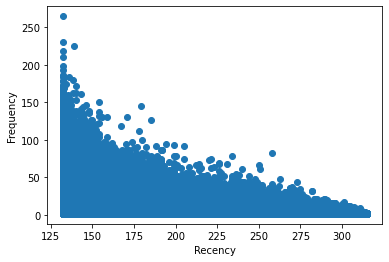

In [80]:
plt.scatter(rfm['recency'],rfm['frequency'])
plt.xlabel("Recency")
plt.ylabel("Frequency")

Text(0, 0.5, 'Monetary')

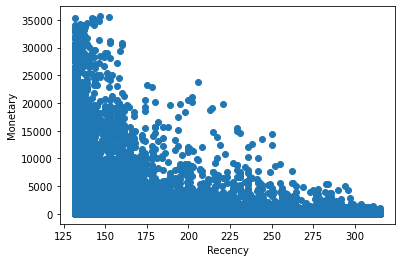

In [81]:
plt.scatter(rfm['recency'],rfm['monetary'])
plt.xlabel("Recency")
plt.ylabel("Monetary")

Text(0, 0.5, 'Frequency')

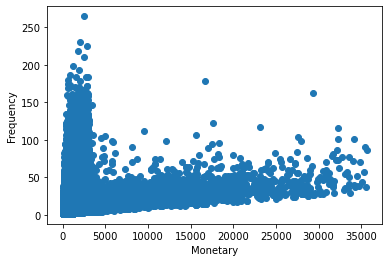

In [82]:
plt.scatter(rfm['monetary'],rfm['frequency'])
plt.xlabel("Monetary")
plt.ylabel("Frequency")

In [89]:
# Standardise
rfmclust = rfm[['monetary','frequency']].copy()
rfmclust["monetary"] = (rfm["monetary"]-rfm["monetary"].mean())/rfm["monetary"].std()
rfmclust["frequency"] = (rfm["frequency"]-rfm["frequency"].mean())/rfm["frequency"].std()
rfmclust.describe()

,monetary,frequency
count,9.573570e+05,9.573570e+05
mean,7.743652e-15,1.005776e-13
std,1.000000e+00,1.000000e+00
min,-5.711655e-01,-9.090375e-01
25%,-4.565573e-01,-6.679758e-01
50%,-2.674538e-01,-2.662062e-01
75%,1.141914e-01,3.766251e-01
max,4.028436e+01,2.030440e+01


In [91]:
scaled_features = rfm[['monetary','frequency']]

In [93]:
# K-Means Clustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [94]:
# The lowest SSE value
kmeans.inertia_

163378272270.19736

In [95]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[1.65699108e+04, 3.30823077e+01],
       [1.76297477e+03, 3.25637690e+01],
       [2.90875781e+02, 9.34036697e+00]])

In [96]:
# The number of iterations required to converge
kmeans.n_iter_

31

In [97]:
kmeans.labels_[:5]

array([2, 2, 2, 2, 2], dtype=int32)

In [98]:
# Elbow method to find number of clusters
kmeans_kwargs = {
    "init": "random",
    "n_init": 50,
    "max_iter": 300,
    "random_state": 123,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

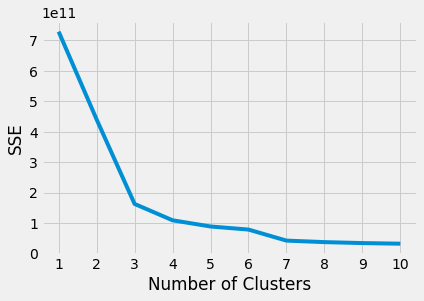

In [99]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

In [ ]:
# Silhouette score to find number of clusters
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)

    silhouette_coefficients.append(score)

In [100]:
kmeans = KMeans(n_clusters= 3)
label = kmeans.fit_predict(scaled_features)
print(label)

[1 1 1 ... 0 1 1]


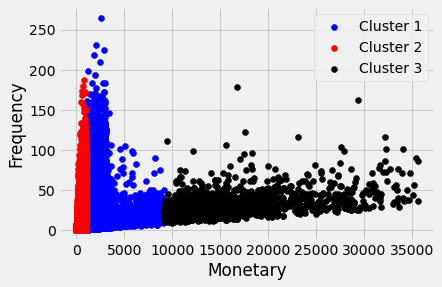

In [105]:
filtered_label0 = scaled_features[label == 0].values
filtered_label1 = scaled_features[label == 1].values
filtered_label2 = scaled_features[label == 2].values

plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'blue', label = "Cluster 1")
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'red', label = "Cluster 2")
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'black', label = "Cluster 3")
plt.legend(loc="upper right")
plt.xlabel("Monetary")
plt.ylabel("Frequency")
#plt.xlim(0, 20)
#plt.ylim(0, 10)
plt.show()

In [ ]:
plt.scatter(rfm['RFM_Score'],rfm['frequency'])
plt.xlabel("RFM_Score")
plt.ylabel("Frequency")

Text(0, 0.5, 'Monetary')

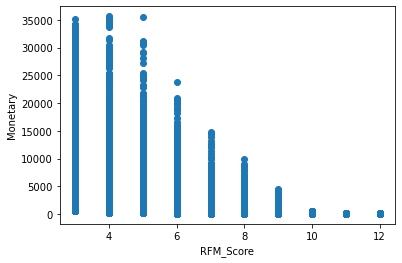

In [86]:
plt.scatter(rfm['RFM_Score'],rfm['monetary'])
plt.xlabel("RFM_Score")
plt.ylabel("Monetary")

In [62]:
#K-means clustering

## Function to check skewness
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

In [68]:
#Removing Skewness
rfm_log = np.log(rfm+1)
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
check_skew(rfm,'recency')
plt.subplot(3, 1, 2)
check_skew(rfm,'frequency')
plt.subplot(3, 1, 3)
check_skew(rfm,'monetary')
plt.tight_layout()

TypeError: can only concatenate str (not "int") to str

NameError: name 'RFM_Table' is not defined

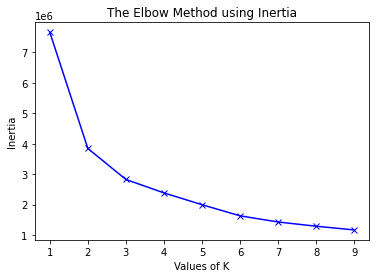

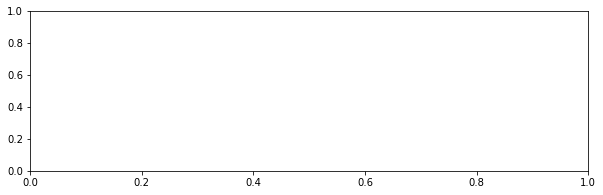

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
scaler.fit(rfm)
RFM_Table_scaled = scaler.transform(rfm)

RFM_Table_scaled = pd.DataFrame(RFM_Table_scaled, columns=rfm.columns)
RFM_Table_scaled.head()

from scipy.spatial.distance import cdist
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(RFM_Table_scaled) 
    kmeanModel.fit(RFM_Table_scaled)     
      
    distortions.append(sum(np.min(cdist(RFM_Table_scaled, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / RFM_Table_scaled.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(RFM_Table_scaled, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / RFM_Table_scaled.shape[0] 
    mapping2[k] = kmeanModel.inertia_
    
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')

def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)
# Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
rfm_k3 = kmeans(RFM_Table_scaled, 3, RFM_Table)
plt.subplot(3, 1, 2)
rfm_k4 = kmeans(RFM_Table_scaled, 4, RFM_Table)
plt.subplot(3, 1, 3)
rfm_k5 = kmeans(RFM_Table_scaled, 5, RFM_Table)
plt.tight_layout()

def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):
    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                       index=RFM_Table.index, 
                                       columns=RFM_Table.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']
# Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['CustomerID', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'Monetary'], 
                        var_name='Metric', 
                        value_name='Value')
plt.xlabel('Metric')
plt.ylabel('Value')
sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
return

def rfm_values(df):
    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': ['mean', 'count']
    }).round(0)
    
    return df_new